## Importing Libraries

In [91]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.model_selection
from sklearn import linear_model
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [2]:
df = pd.read_csv('student-mat.csv', sep = ';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
df = df[['G1', 'G2', 'G3', 'absences', 'Dalc', 'failures', 'studytime']]
df

,G1,G2,G3,absences,Dalc,failures,studytime
0,5,6,6,6,1,0,2
1,5,5,6,4,1,0,2
2,7,8,10,10,2,3,2
3,15,14,15,2,1,0,3
4,6,10,10,4,1,0,2
...,...,...,...,...,...,...,...
390,9,9,9,11,4,2,2
391,14,16,16,3,3,0,1
392,10,8,7,3,3,3,1
393,11,12,10,0,3,0,1


## Splitting and training our data

In [33]:
X = df.drop(['G3'], 1)
y = df['G3']

In [64]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.25)

In [65]:
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
predictions = lr.predict(x_test)

In [67]:
predictions.astype('int64')

array([10, 13,  7, 11,  5, -1, 15,  8,  8, 11, 16,  3,  9, 10, 16,  4,  8,
       13, 11,  8,  8,  9,  6,  8, 13,  6, 16, 16, 14, 19,  7, -1,  3,  9,
       14, 16,  7,  3, 12, 15,  3, 16,  7, 17, 12,  8,  4,  7,  5,  9, 14,
       12, 11,  6,  9, 15, 11,  7, 10,  5, 11, -1, 12, 10,  5, 13,  9, 10,
       11, 15, 15, 11, 12, 15, 15, 11,  9, 10, 10, 19, 12,  8, 10,  6, 12,
       15,  9, 12, 12, 10,  7,  3,  6, 10,  9,  5,  8, 11, 13],
      dtype=int64)

In [90]:
acc = lr.score(x_test, y_test)
acc

0.8245667212275269

## Saving our model 

In [95]:
with open("studentmarks.pickle", "wb") as f:
    pickle.dump(lr, f)


In [102]:
pickle_in = open("studentmarks.pickle", "rb")
linear = pickle.load(pickle_in)

## Plotting graphs

No handles with labels found to put in legend.


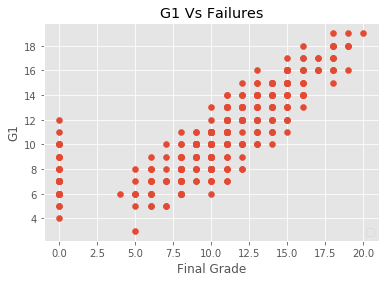

No handles with labels found to put in legend.


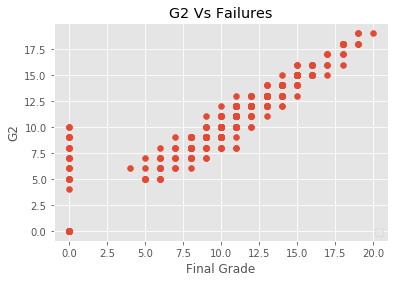

No handles with labels found to put in legend.


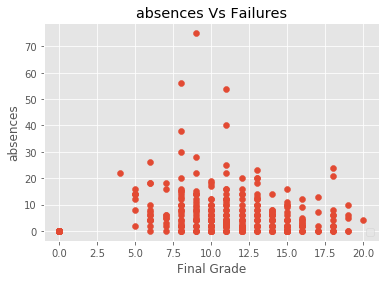

No handles with labels found to put in legend.


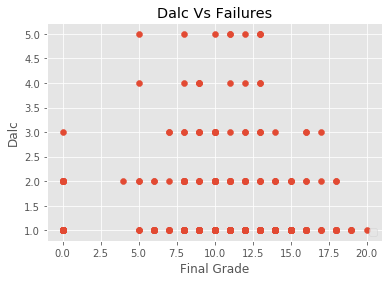

No handles with labels found to put in legend.


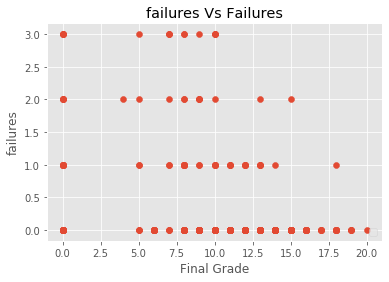

In [122]:
style.use("ggplot")
for i in range(len(df.columns) - 1):
    if df.columns[i] != 'G3':
        plot = df.columns[i]
        plt.scatter(df["G3"], df[plot])
        plt.legend(loc=4)
        plt.title(df.columns[i]+ ' Vs Failures')
        plt.ylabel(plot)
        plt.xlabel("Final Grade")
        plt.show()